In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('coin_Bitcoin.csv')
df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
df.shape


(2991, 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [5]:
df.describe()


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [6]:
df['target'] = (df['Low'] + df['High']) / 2
df = df.drop(['Open', 'Close'], axis=1)
df.head()


,SNo,Name,Symbol,Date,High,Low,Volume,Marketcap,target
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,0.0,1.085995e+09,93.613998


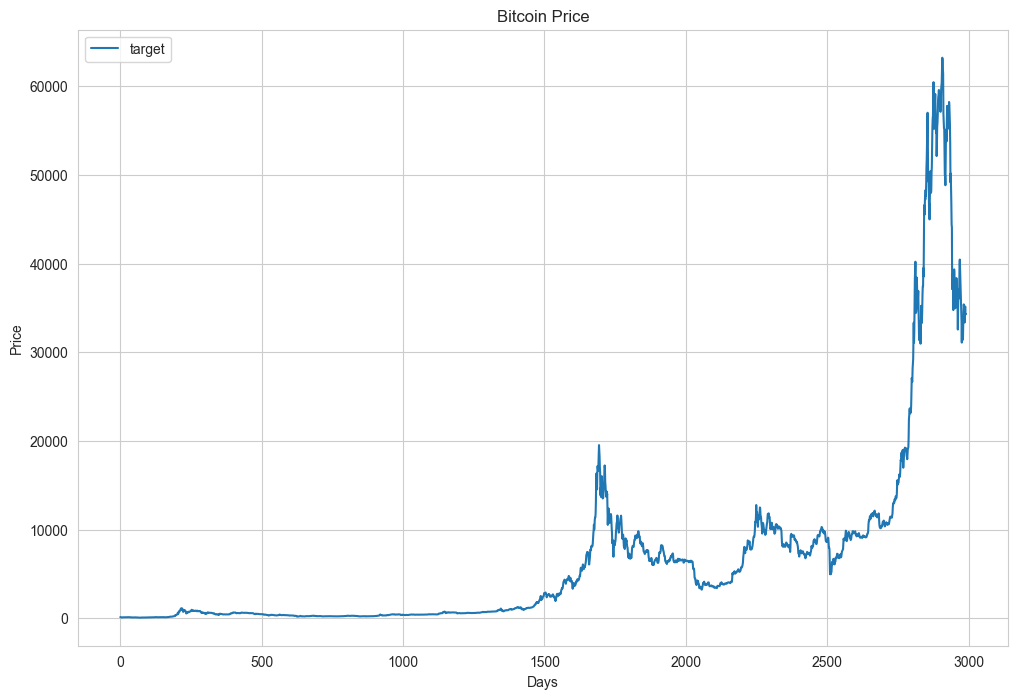

In [18]:
#visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

plt.plot(df['target'], label='target')

plt.title('Bitcoin Price')

plt.xlabel('Days')

plt.ylabel('Price') 

plt.legend()

plt.show()

        

In [7]:
# Preprocess the date column. Convert it into long format.
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype(np.int64)
df.head()


,SNo,Name,Symbol,Date,High,Low,Volume,Marketcap,target
0,1,Bitcoin,BTC,1367279999000000000,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,2,Bitcoin,BTC,1367366399000000000,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,3,Bitcoin,BTC,1367452799000000000,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,4,Bitcoin,BTC,1367539199000000000,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,5,Bitcoin,BTC,1367625599000000000,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [8]:
# encode the object type columns

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

In [9]:
# Split the data into train and test set. Train the model on training set and get the predictions on the test set. Find the error between actual and predicted values.
 
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# apply linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# calculate the error
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Squared Error:  1.0951420799612485e-15
Mean Absolute Error:  2.874320553705233e-08


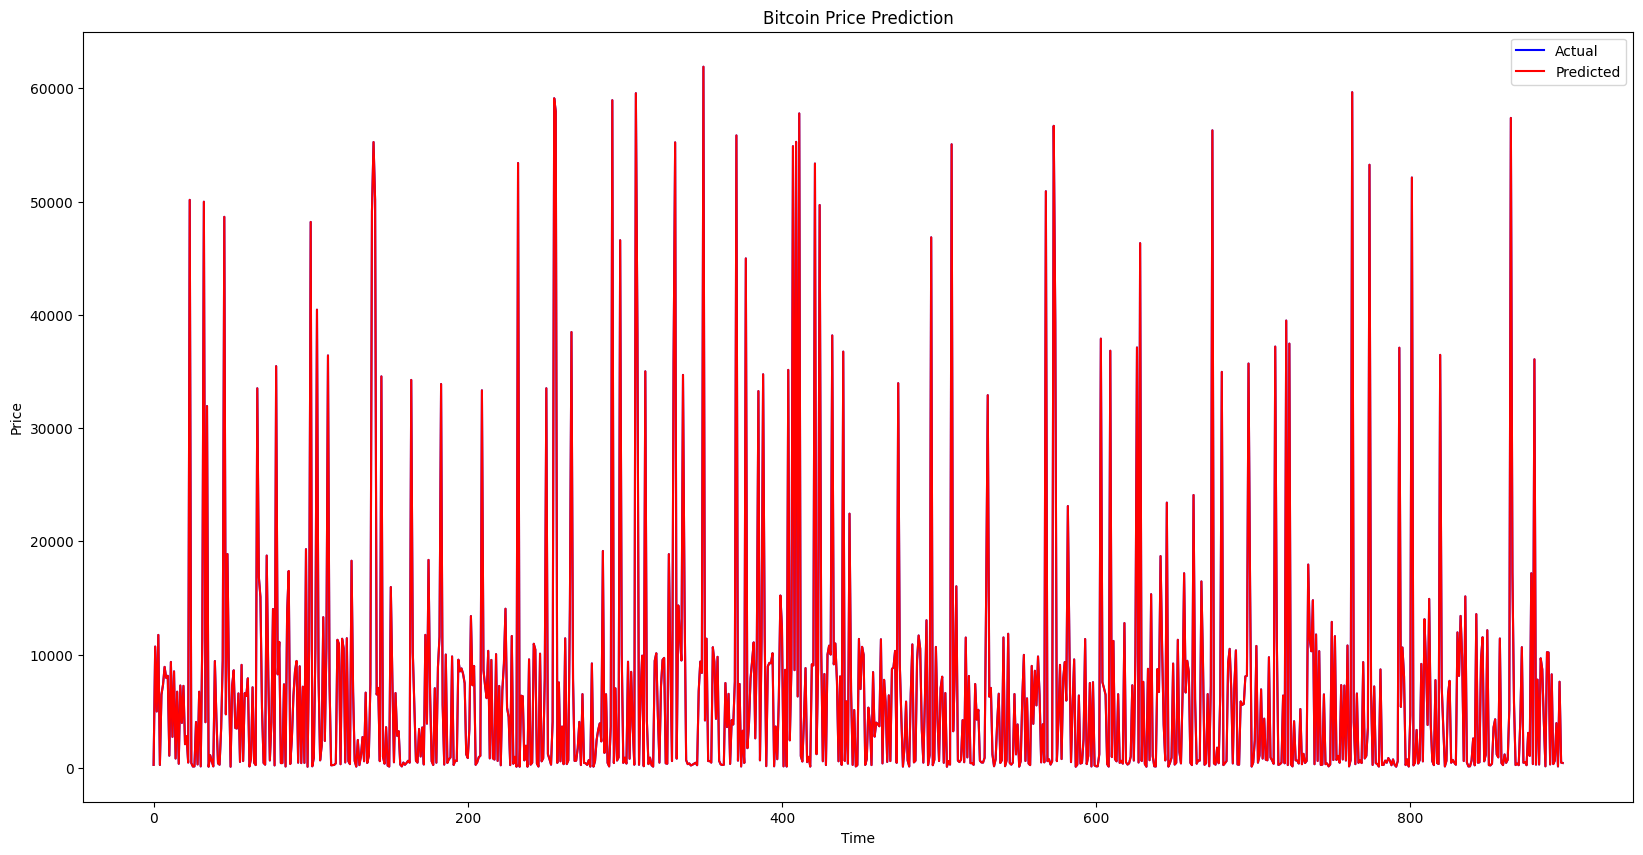

In [17]:
#VISUALIZE THE PREDICTIONS
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))

plt.plot(y_test.values, color='blue', label='Actual')   

plt.plot(y_pred, color='red', label='Predicted')

plt.title('Bitcoin Price Prediction')

plt.xlabel('Time')

plt.ylabel('Price')

plt.legend()
    